In [113]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [114]:
# ceph fs
df_ceph_fs_imgs = pd.read_csv("../ceph/df_t_ceph_imgs.csv")
df_ceph_fs_mbit = pd.read_csv("../ceph/df_t_ceph_mbit.csv")
# ceph os 
df_ceph_os_imgs = pd.read_csv("../ceph-os/df_t_ceph_os_imgs.csv")
df_ceph_os_mbit = pd.read_csv("../ceph-os/df_t_ceph_os_mbit.csv")
# gluster fs
df_gluster_fs_imgs = pd.read_csv("../gluster_repeated/df_t_gluster_imgs.csv")
df_gluster_fs_mbit = pd.read_csv("../gluster_repeated/df_t_gluster_mbit.csv")

In [115]:
df_ceph_fs_imgs_lst = df_ceph_fs_imgs.iloc[0][1:11].to_list() 
df_ceph_fs_mbit_lst = df_ceph_fs_mbit.iloc[0][1:11].to_list() 

df_ceph_os_imgs_lst = df_ceph_os_imgs.iloc[0][1:5].to_list() 
df_ceph_os_mbit_lst = df_ceph_os_mbit.iloc[0][1:5].to_list() 

df_gluster_fs_imgs_lst = df_gluster_fs_imgs.iloc[0][1:11].to_list() 
df_gluster_fs_mbit_lst = df_gluster_fs_mbit.iloc[0][1:11].to_list() 

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f3daf8eb5e0>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f3db426e4c0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f3daf93d430>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f3daf894520>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f3daf894340>}

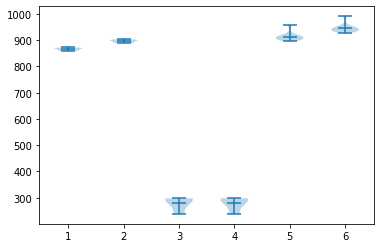

In [116]:
plt.violinplot([df_ceph_fs_imgs_lst, df_ceph_fs_mbit_lst, 
               df_ceph_os_imgs_lst, df_ceph_os_mbit_lst,
               df_gluster_fs_imgs_lst, df_gluster_fs_mbit_lst], 
               vert=True, widths=0.5, showmeans=True)

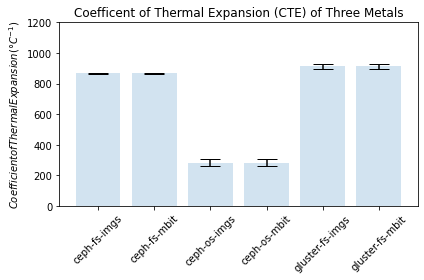

In [141]:
matplotlib.rcParams.update({'font.size': 10})


df_ceph_os_imgs_lst = df_ceph_os_imgs.iloc[0][7:10].to_list() 
df_ceph_os_mbit_lst = df_ceph_os_mbit.iloc[0][7:10].to_list() 

df_ceph_fs_imgs_lst = df_ceph_fs_imgs.iloc[0][11:14].to_list() 
df_ceph_fs_mbit_lst = df_ceph_fs_mbit.iloc[0][11:14].to_list() 

df_gluster_fs_imgs_lst = df_gluster_fs_imgs.iloc[0][11:14].to_list() 
df_gluster_fs_mbit_lst = df_gluster_fs_mbit.iloc[0][11:14].to_list() 


materials = ['ceph-fs-imgs', 'ceph-fs-mbit', 'ceph-os-imgs', 'ceph-os-mbit', 'gluster-fs-imgs', 'gluster-fs-mbit']
x_pos = np.arange(len(materials))


means = [df_ceph_fs_imgs_lst[0], df_ceph_fs_imgs_lst[0], 
         df_ceph_os_imgs_lst[0], df_ceph_os_mbit_lst[0],
         df_gluster_fs_imgs_lst[0], df_gluster_fs_imgs_lst[0]]

errors = [df_ceph_fs_imgs_lst[2], df_ceph_fs_imgs_lst[2], 
          df_ceph_os_imgs_lst[2], df_ceph_os_mbit_lst[2],
          df_gluster_fs_imgs_lst[2], df_gluster_fs_imgs_lst[2]]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=errors, align='center', alpha=0.2, ecolor='black', capsize=10)
ax.set_ylabel('$Coefficient of Thermal Expansion (\degree C^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')

ax.set_xticks(np.arange(len(materials)), materials, rotation="45")
ax.set_ylim([0, 1200])


# Save the figure and show
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Throughput [Mbit/s]')

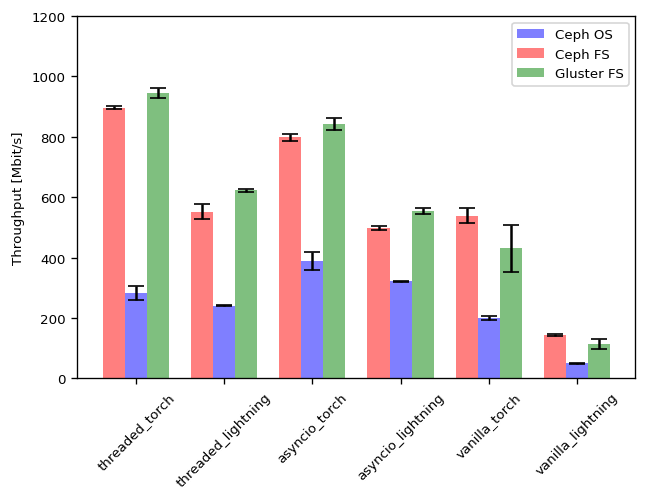

In [190]:
matplotlib.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(dpi=120)
offset = 0
width = 0.25
x_labels = []

for i in range(6):
#     print(df_ceph_os_imgs.iloc[i][7:10].to_list())
#     df_ceph_os_imgs.iloc[i][0]
    current = df_ceph_os_mbit.iloc[i].to_list()
#     print(current[0])
    x_labels.append(current[0])
    ax.bar(height=current[7], yerr=current[9],
           x=i, width=width, align='center', alpha=0.5, ecolor='black', capsize=5,
           label=current[0], color="blue")
    
    current = df_ceph_fs_mbit.iloc[i].to_list()
#     print(current[0])
    ax.bar(height=current[11], yerr=current[13],
           x=i-0.25, width=width, align='center', alpha=0.5, ecolor='black', capsize=5,
           label=current[0], color="red")

    current = df_gluster_fs_mbit.iloc[i].to_list()
#     print(current[0])
    ax.bar(height=current[11], yerr=current[13],
           x=i+0.25, width=width, align='center', alpha=0.5, ecolor='black', capsize=5,
           label=current[0], color="green")

ax.set_ylim([0, 1200])
ax.set_xticks(np.arange(len(x_labels)), x_labels, rotation="45")
ax.legend(["Ceph OS", "Ceph FS", "Gluster FS"])
ax.set_ylabel("Throughput [Mbit/s]")
